### Graphene Dataset Processing

In [2]:
import sys, os
sys.path.append(os.path.abspath(os.getcwd()))
sys.path.append("pyptychostem")
import matplotlib.pyplot as plt
import numpy as np

from STEM4D import *

# Load in the graphene dataset
parfile = "graphene_parameters.txt"
params = np.genfromtxt(parfile, delimiter='\t', dtype=str)

data_4D = Data4D(parfile)

['file', 'graphene_simu_reshaped.npy']
['method', 'ssb']
['aperture', '0.03']
['stepsize', '0.2']
['voltage', '60.0']
['rotation', '0']
['threshold', '0.3']
c:\Users\cttew\Desktop\code\holo/


<Signal2D, title: 4D data, dimensions: (65, 64|256, 256)>

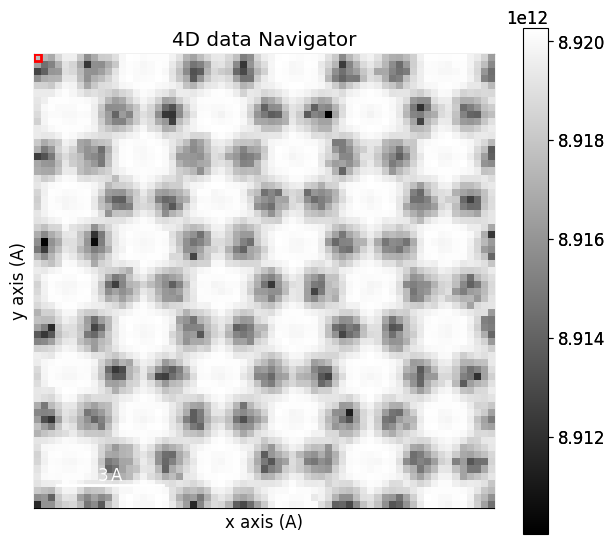

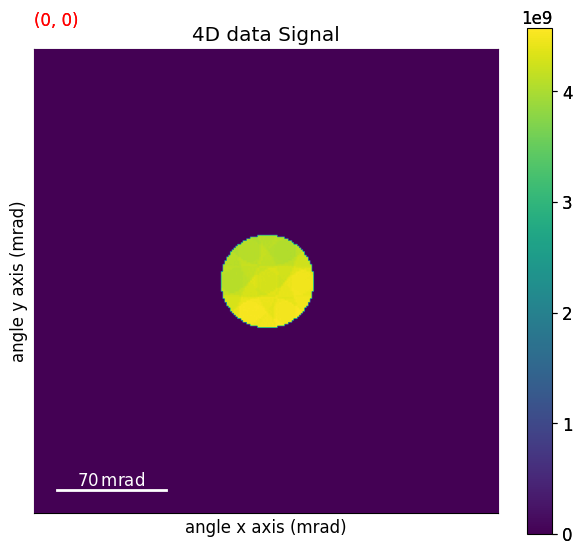

In [5]:
# Plot the data
data_4D.estimate_aperture_size()
data_4D.plot_4D()

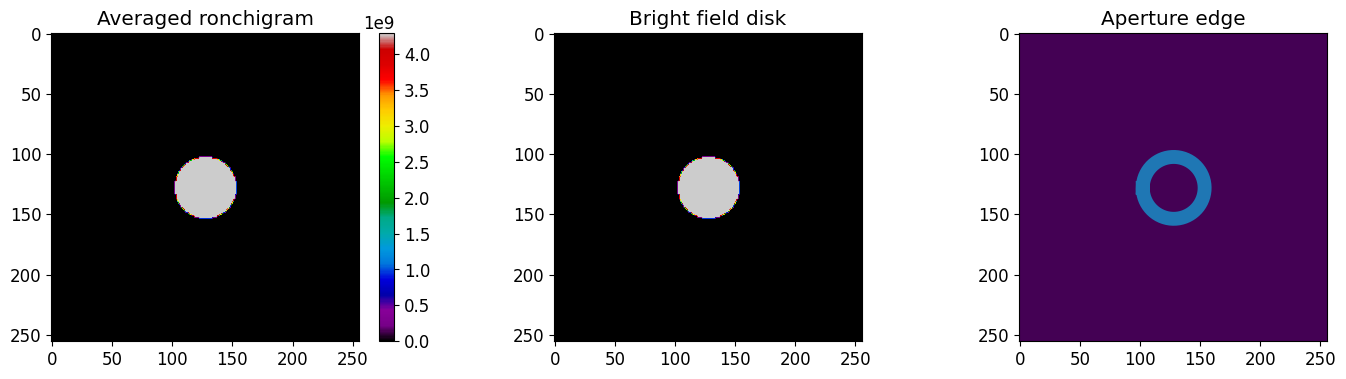

In [8]:
# Plot the apature and crop it
data_4D.plot_aperture()
data_4D.truncate_ronchigram(expansion_ratio=None)

<Signal2D, title: FT of 4D data, dimensions: (65, 64|256, 256)>

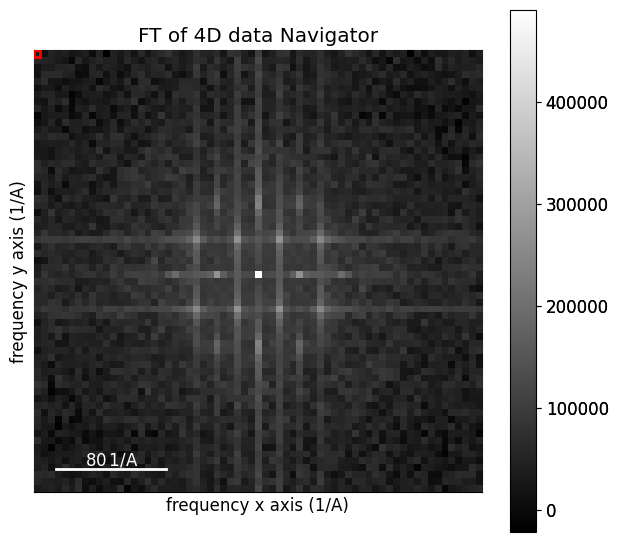

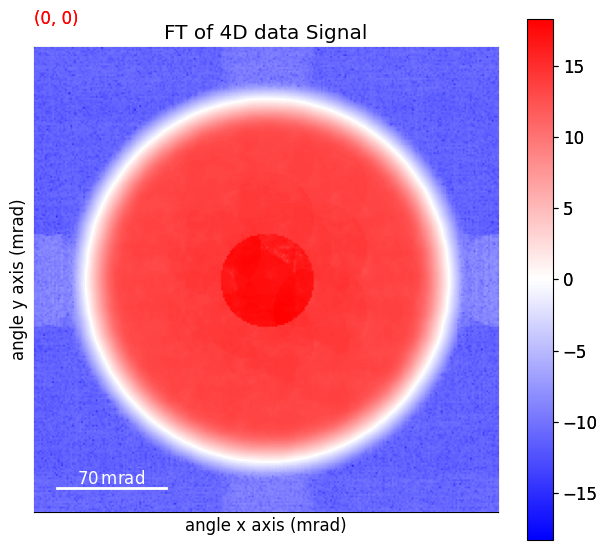

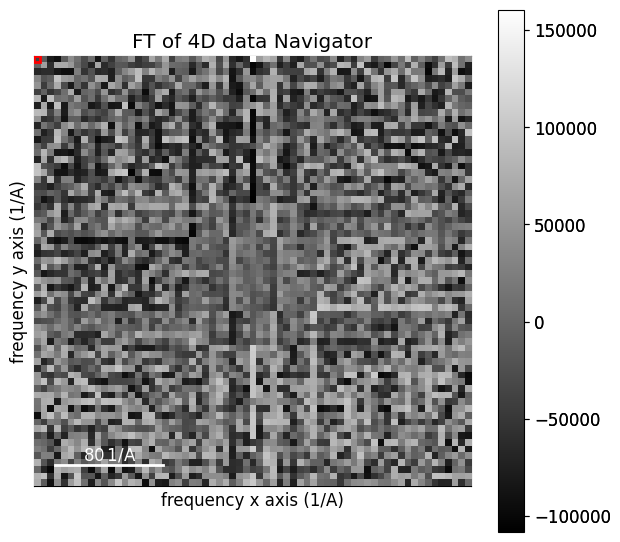

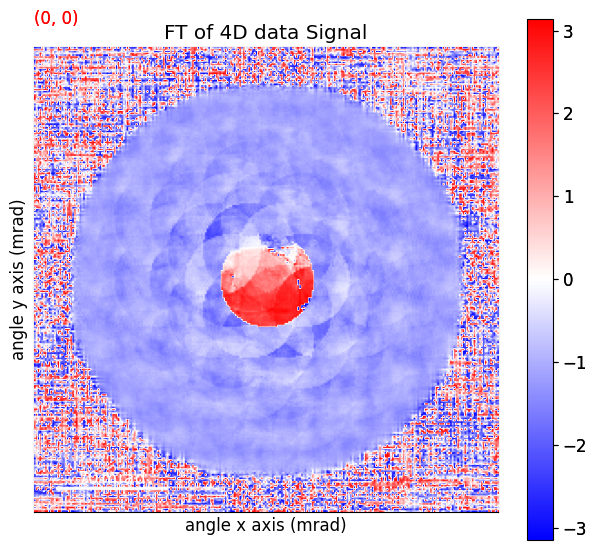

In [9]:
# Apply the FT to the data and extract the amplitude and phase
data_4D.apply_FT()
data_4D.plot_4D_reciprocal(signal="amplitude")
data_4D.plot_4D_reciprocal(signal="phase")

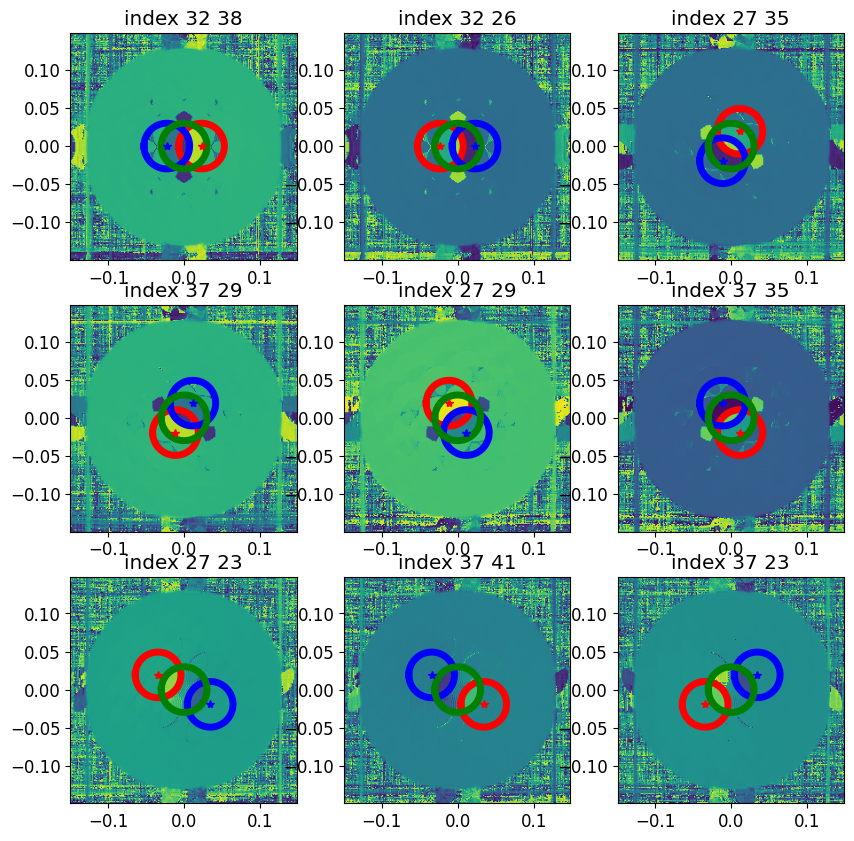

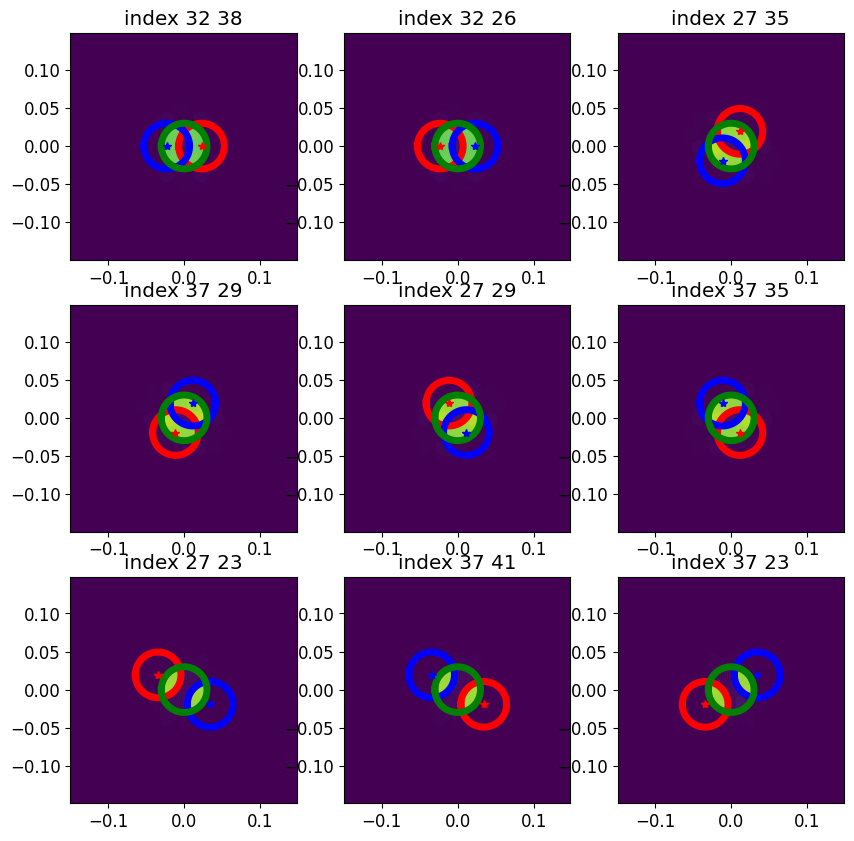

In [10]:
# Plot the highest intensity trotters
rotation = 0
data_4D.plot_trotters(rotation, plot_constrains=True, skip=1)

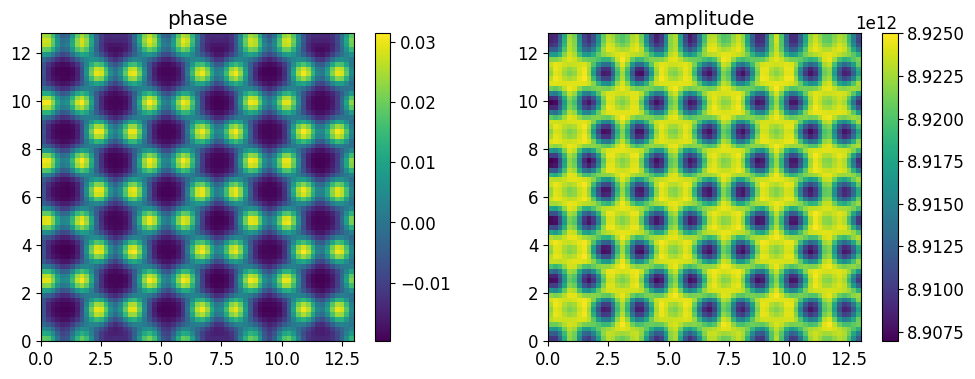

In [11]:
# Run SSB
ssb = SSB(data_4D)
ssb.run()
ssb.plot_result()

In [12]:
# Run abberation correction
svd = SVD_AC(data_4D,trotters_nb=5)
svd.find_trotters()
coeffs = svd.run_svd()

5 trotters found


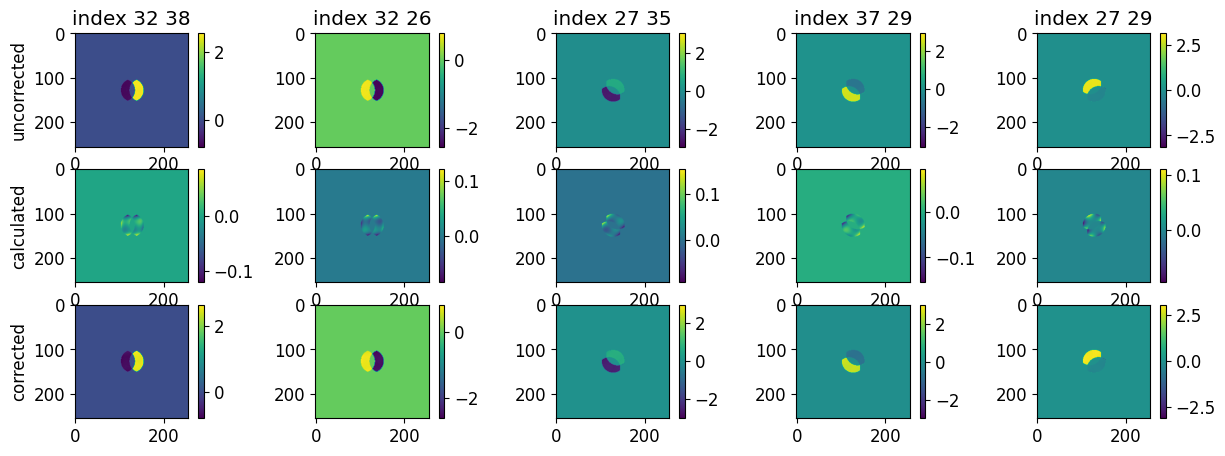

In [14]:
# Plot the corrected trotters
svd.plot_corrected_trotters(data_4D.selected_frames, coeffs) 

In [ ]:
# Run SSB with the aberation correction
ssb_ac = SSB(data_4D)
ssb_ac.run(aberrations=coeffs)